In [5]:
import sys 
import os 
sys.path.insert(1, '..')
sys.path.insert(2, '../modules/')
from glob import glob
import re
import pickle
import numpy as np
import os
import pandas as pd
import dataconfig
import matplotlib.pyplot as plt

In [6]:
original_files = 'all_best_fits_w_lowpass_filter_v3.pickle'

origi_lasso_files = glob(f'{dataconfig.DATA_DIR_FLARE_CANDIDATES}/*/{original_files}')
origi_lasso_files

['/mnt/e/ALEXIS_data/flare_candidates/flarecandidate_C4.0_at_2011-02-08T21_11_00_08.working/all_best_fits_w_lowpass_filter_v3.pickle']

In [7]:
origi_lasso_fit = pickle.load(open(origi_lasso_files[0], 'rb'))

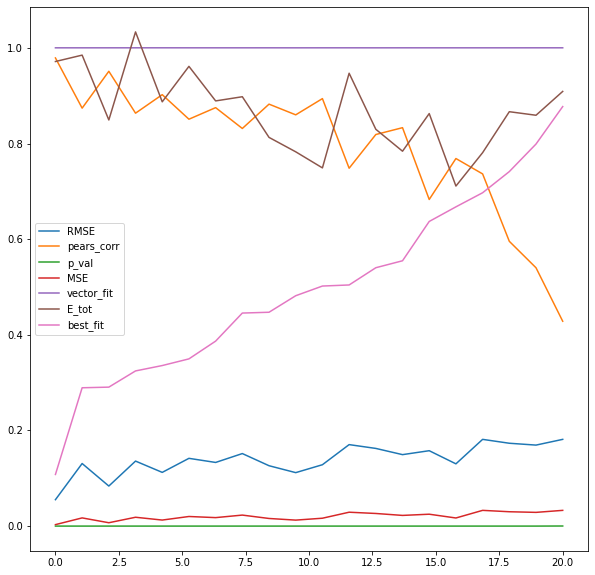

In [8]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plot_origi_data = origi_lasso_fit[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'img_wavelength', 'xrs_wavelength']].sort_values(by = 'best_fit')

metric_list = ['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit']

for this_metric in metric_list:
    linspace = np.linspace(0,len(plot_origi_data), len(plot_origi_data))
    ax.plot(linspace,plot_origi_data[this_metric], label = this_metric)

ax.legend()

<ipython-input-9-df92aaf89978>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-df92aaf89978>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-df92aaf89978>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-df92aaf89978>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-df92aaf89978>:8: MatplotlibDeprecationWarning: Passing 

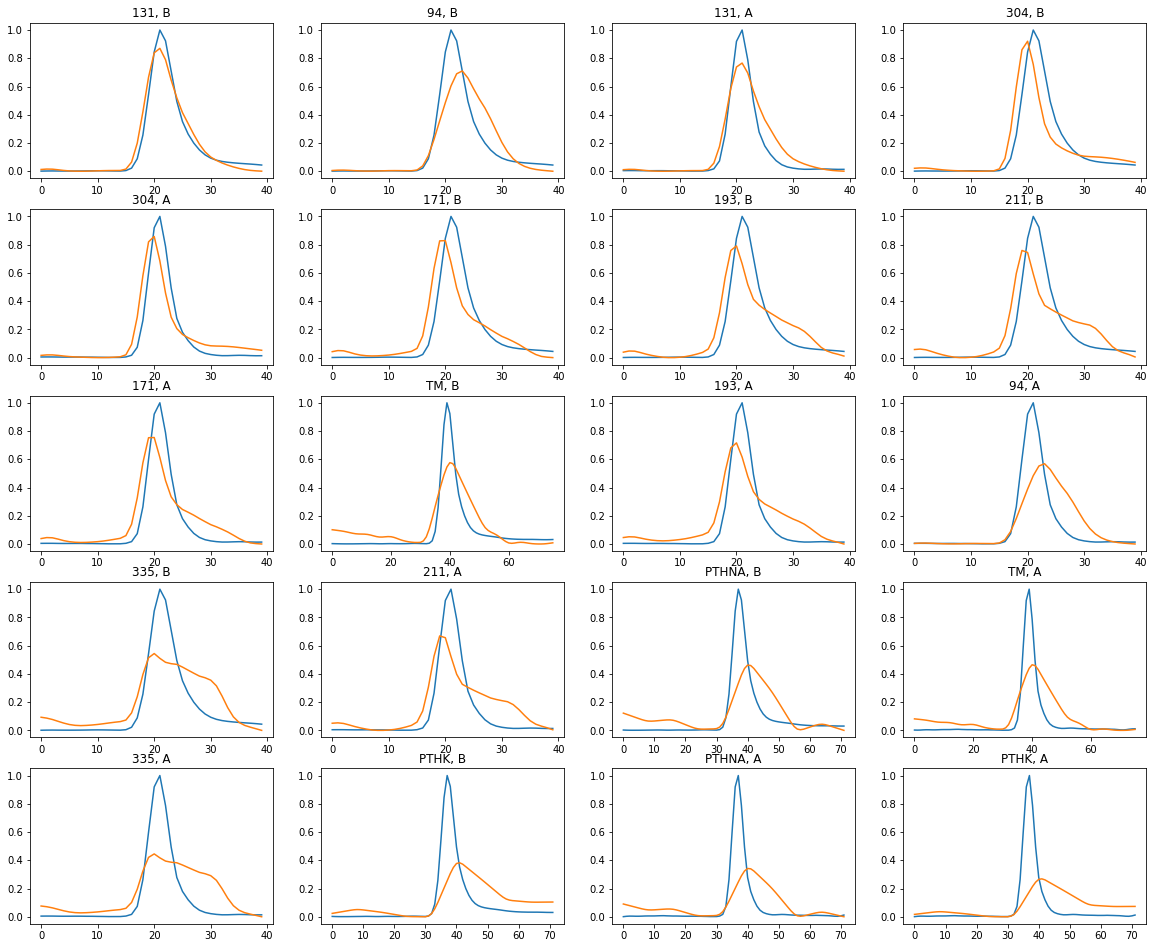

In [9]:
fig = plt.figure(figsize = (20,20))

ax_x = len(origi_lasso_fit)/3

num = 1
for _, row in origi_lasso_fit.sort_values(by = 'best_fit').iterrows():

    ax = fig.add_subplot(ax_x, 4, num)

    xray = row['xray_data']
    signal = row['linear_combo_fit']



    ax.plot(xray)
    ax.plot(signal)

    img, xrs = row['img_wavelength'], row['xrs_wavelength']

    ax.set_title(f'{img}, {xrs}')
    num = num+1

    

In [10]:
# def new_distance(row):

#     RMSE, E_tot, pears = row['RMSE'], row['E_tot'], row['pears_corr']

#     new_dist = (((RMSE**2) + (E_tot)**2 + ((pears - 1)**2))/4)**(1/2)

#     return(new_dist)

In [11]:
# origi_lasso_fit['new_distance'] = [new_distance(row) for _, row in origi_lasso_fit.iterrows()]

In [12]:
# fig = plt.figure(figsize = (20,10))
# ax = fig.add_subplot(1,2,1)

# plot_origi_data = origi_lasso_fit[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'img_wavelength', 'xrs_wavelength','new_distance']].sort_values(by = 'new_distance')

# metric_list = ['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit','new_distance']

# for this_metric in metric_list:
#     linspace = np.linspace(0,len(plot_origi_data), len(plot_origi_data))
#     ax.plot(linspace,plot_origi_data[this_metric], label = this_metric)

# ax.legend()

# ax2 = fig.add_subplot(1,2,2)

# plot_origi_data = origi_lasso_fit[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'img_wavelength', 'xrs_wavelength','new_distance']].sort_values(by = 'best_fit')

# metric_list = ['RMSE', 'pears_corr','E_tot', 'best_fit','new_distance']

# for this_metric in metric_list:
#     linspace = np.linspace(0,len(plot_origi_data), len(plot_origi_data))
#     ax2.plot(linspace,plot_origi_data[this_metric], label = this_metric)

# ax2.legend()

In [13]:
# lets try to normalize over the sample

all_lasso_file = 'v3_LASSO_df.pickle'


glob_lasso_files = glob(f'{dataconfig.DATA_DIR_FLARE_CANDIDATES}/*/{all_lasso_file}')
glob_lasso_files

['/mnt/e/ALEXIS_data/flare_candidates/flarecandidate_C4.0_at_2011-02-08T21_11_00_08.working/v3_LASSO_df.pickle']

In [14]:
all_fits = pickle.load(open(glob_lasso_files[0], 'rb'))

In [15]:
# lets choose only one sample wl and inst


test_xrs_wl, test_xrs_inst, test_img_wl = 'B', 'goes15', 131

mask = all_fits[(all_fits.xrs_wavelength == test_xrs_wl) & (all_fits.xrs_telescope == test_xrs_inst) & (all_fits.img_wavelength == test_img_wl)]

# mask = all_fits

In [16]:
mask.E_tot.max(), mask.E_tot.min()

(196.97975105754062, 0.9543143844471842)

In [17]:
def normalize_map_to_neg1_and_1(list_of_numbers,x_opt):
    
    x_max = max(list_of_numbers)
    a = -2 / (x_max - x_opt)
    b = 1 + (2 * x_opt) / (x_max - x_opt)

    normalized_list = [a * x + b for x in list_of_numbers]

    return(normalized_list)


In [18]:
mask['normed_etot'] = normalize_map_to_neg1_and_1(mask.E_tot,1)
mask['normed_RMSE'] = normalize_map_to_neg1_and_1(mask.RMSE,0)
mask['normed_vtot'] = normalize_map_to_neg1_and_1(mask.vector_fit,1)

<ipython-input-18-c8e81bba098a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['normed_etot'] = normalize_map_to_neg1_and_1(mask.E_tot,1)
<ipython-input-18-c8e81bba098a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['normed_RMSE'] = normalize_map_to_neg1_and_1(mask.RMSE,0)
<ipython-input-18-c8e81bba098a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

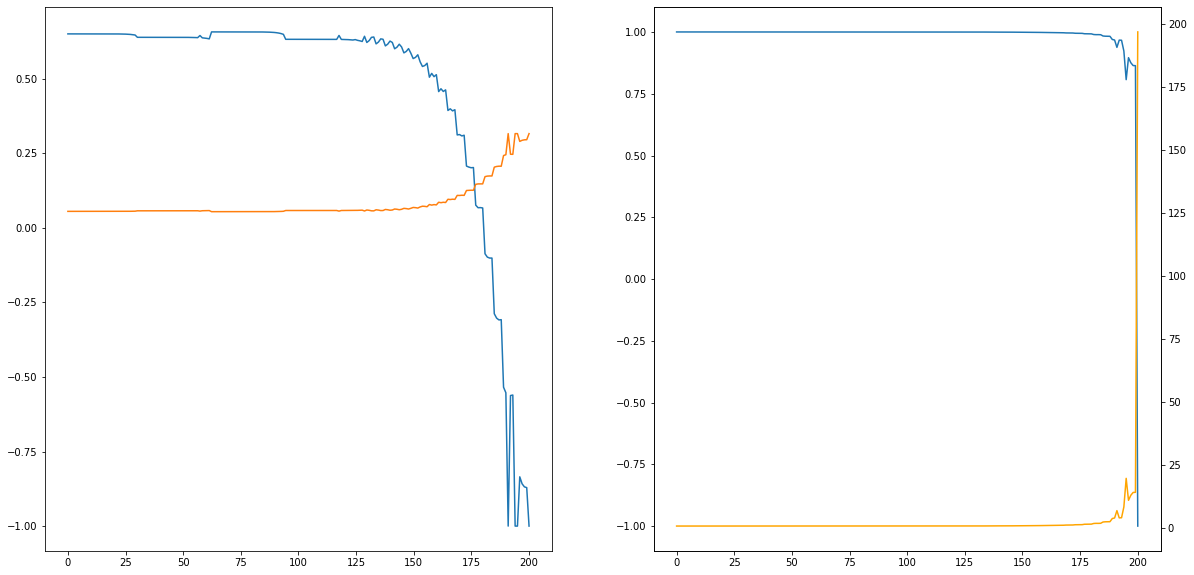

In [19]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xval= np.linspace(0,len(mask), len(mask))
ax2.plot(xval, mask.normed_etot)
ax.plot(xval, mask.normed_RMSE)
ax3 = ax2.twinx()
ax3.plot(xval, mask.E_tot, color = 'orange')
ax.plot(xval, mask.RMSE)

In [20]:
def new_distance(row):

    RMSE, E_tot, pears, v_fit = row['normed_RMSE'], row['normed_etot'], row['pears_corr'], row['normed_vtot']

    RMSE_calc = ((RMSE-1)**2)/4

    E_tot_calc = ((E_tot - 1)**2)/4

    pears_calc = (((pears - 1)**2))/4

    v_calc = (((v_fit - 1)**2))/4

    new_dist = (RMSE_calc + E_tot_calc + pears_calc )**(1/2)

    return(new_dist)

In [21]:
np.sqrt(3)

1.7320508075688772

In [22]:
mask['new_distance'] = [new_distance(this_row) for _, this_row in mask.iterrows()]

<ipython-input-22-a2d00b61c560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['new_distance'] = [new_distance(this_row) for _, this_row in mask.iterrows()]


In [23]:
mask.sort_values(by = 'new_distance')[:1]

,lamda,coeff,img_wavelength,img_telescope,img_instrument,xrs_instrument,xrs_wavelength,xrs_telescope,zoom_in_type,resampled_file,...,xray_data,linear_combo_fit,resampled_time_stamp,best_fit,cluster_matrix,zoom_lasso_run_time,normed_etot,normed_RMSE,normed_vtot,new_distance
0,0.001,[0.8726252924215159],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,"[0.0008479993662036641, 0.0016991879683441612,...","[0.020726932961372208, 0.022849300973540727, 0...","[1297198275, 1297198335, 1297198395, 129719845...",0.122751,"[[0.020726932961372208, 0.022849300973540727, ...",0.024556,1.000466,0.656909,0.999986,0.171832


<ipython-input-24-0c9d31d0bb00>:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)


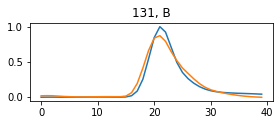

In [24]:
fig = plt.figure(figsize = (20,10))

ax_x = len(origi_lasso_fit)/3

plot_df_list = []
num = 1
for label, group in mask.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument']):

    row = group.sort_values(by = 'new_distance')

    plot_df_list.append(row.iloc[0].to_dict())

plot_df = pd.DataFrame(plot_df_list)
num = 1
for _, row in plot_df.sort_values(by = 'new_distance').iterrows():

    ax = fig.add_subplot(ax_x, 4, num)

    xray = row['xray_data']
    signal = row['linear_combo_fit']



    ax.plot(xray)
    ax.plot(signal)

    img, xrs = row['img_wavelength'], row['xrs_wavelength']

    ax.set_title(f'{img}, {xrs}')
    num = num+1

In [25]:
def normalize_map_to_neg1_and_1(list_of_numbers,x_opt):
    
    x_max = max(list_of_numbers)
    a = -2 / (x_max - x_opt)
    b = 1 + (2 * x_opt) / (x_max - x_opt)
    # print(a,b)

    normalized_list = [a * x + b for x in list_of_numbers]

    return(normalized_list)

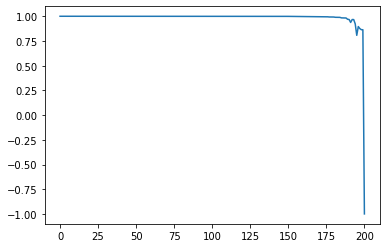

In [26]:
list_of_numbers = mask.E_tot
plt.plot(np.linspace(0, len(list_of_numbers), len(list_of_numbers)),normalize_map_to_neg1_and_1(list_of_numbers, 1))

In [27]:
def new_distance(row):

    RMSE, E_tot, pears,  = row['normed_RMSE'], row['normed_etot'], row['pears_corr']

    RMSE_calc = ((RMSE-1)**2)/4

    E_tot_calc = ((E_tot - 1)**2)/4

    pears_calc = (((pears - 1)**2))/4

    new_dist = (RMSE_calc + E_tot_calc + pears_calc )**(1/2)

    return(new_dist)

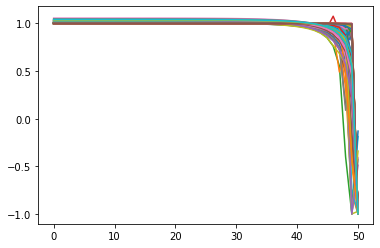

In [28]:
# lets first find the best in each zoomin 

first_sample = []

for label, group1 in all_fits.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument', 'zoom_in_type']):

    group1['normed_etot'] = normalize_map_to_neg1_and_1(group1.E_tot.to_list(),1)
    group1['normed_RMSE'] = normalize_map_to_neg1_and_1(group1.RMSE.to_list(),0)

    group1['new_distance'] = [new_distance(this_row) for _, this_row in group1.iterrows()]

    sorted_group = group1.sort_values(by = 'new_distance').iloc[0]

    plt.plot(np.linspace(0, len(group1), len(group1)),normalize_map_to_neg1_and_1(group1.E_tot, 1))

    # print(group1.E_tot.to_list())

    first_sample.append(sorted_group.to_dict())


In [29]:
first_df = pd.DataFrame(first_sample)

first_df[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'new_distance', 'img_wavelength', 'xrs_wavelength', 'zoom_in_type','normed_etot','normed_RMSE']].sort_values(by = 'new_distance')


,RMSE,pears_corr,p_val,MSE,vector_fit,E_tot,best_fit,new_distance,img_wavelength,xrs_wavelength,zoom_in_type,normed_etot,normed_RMSE
47,0.054187,0.980170,2.534389e-28,0.002936,1.000239,0.954435,0.122757,0.171866,131,B,"(150,)",1.006829,0.656909
46,0.055236,0.978958,7.744184e-28,0.003051,1.000110,0.971468,0.107971,0.175189,131,B,"(100,)",1.003021,0.650267
45,0.057048,0.977597,2.517335e-27,0.003254,1.000237,0.967649,0.115293,0.180969,131,B,"(80,)",1.005311,0.638795
44,0.058105,0.976984,4.182536e-27,0.003376,1.000110,0.957250,0.127356,0.184308,131,B,"(50,)",1.000436,0.632103
6,0.083738,0.951050,5.627331e-21,0.007012,1.000128,0.849250,0.290578,0.293538,131,A,"(100,)",1.009114,0.415038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.174611,0.523365,2.392832e-06,0.030489,1.000139,0.764304,0.917572,0.852050,PTHK,A,"(50,)",1.000173,-0.636085
30,0.177864,0.493370,1.065615e-05,0.031636,1.000141,0.776667,0.939614,0.870937,PTHK,A,"(100,)",1.001291,-0.666568
29,0.179083,0.515148,3.654188e-06,0.032071,1.000133,0.738526,0.957616,0.873315,PTHK,A,"(80,)",1.000427,-0.677985
35,0.179122,0.456057,5.673547e-05,0.032085,1.000144,0.864085,0.891265,0.882147,PTHNA,A,"(150,)",1.000104,-0.678350


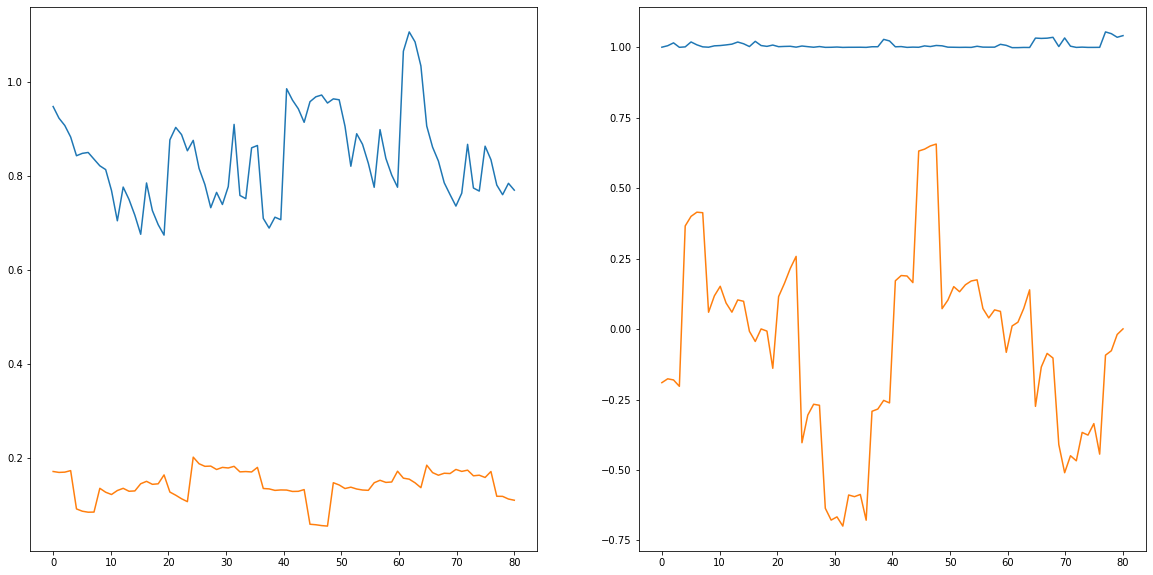

In [30]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xval= np.linspace(0,len(first_df), len(first_df))
ax2.plot(xval, first_df.normed_etot)
ax2.plot(xval, first_df.normed_RMSE)

ax.plot(xval, first_df.E_tot)
ax.plot(xval, first_df.RMSE)

In [31]:
def normalize_map_to_neg1_and_1_2(list_of_numbers,x_opt):
    
    x_max = min(list_of_numbers)
    a = -2 / (x_max - x_opt)
    b = 1 + (2 * x_opt) / (x_max - x_opt)
    # print(a,b)

    normalized_list = [a * x + b for x in list_of_numbers]

    # x_max = min(list_of_numbers)
    # # x_opt = your_optimal_value  # Set your desired optimal value here
    # a = 2 / (x_opt - x_max)
    # b = -1

    # normalized_list = [a * (x - x_max) + b for x in list_of_numbers]

    return(normalized_list)



In [32]:
first_df = pd.DataFrame(first_sample)
# lets second find the best in each and wl pair 
second_sample = []

# for label, group in first_df.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument']):

    

first_df['normed_etot'] = normalize_map_to_neg1_and_1_2(first_df.E_tot,1)
first_df['normed_RMSE'] = normalize_map_to_neg1_and_1(first_df.RMSE,0)

first_df['new_distance'] = [new_distance(this_row) for _, this_row in first_df.iterrows()]

sorted_group = first_df.sort_values(by = 'new_distance')

# print(len(first_df), first_df.E_tot.to_list(), first_df.normed_etot.to_list())
# print(len(first_df), first_df.RMSE.to_list(), first_df.normed_RMSE.to_list())

    # second_sample.append(sorted_group.iloc[0].to_dict())


In [33]:
sorted_group[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'new_distance', 'img_wavelength', 'xrs_wavelength', 'zoom_in_type','normed_etot','normed_RMSE']]

,RMSE,pears_corr,p_val,MSE,vector_fit,E_tot,best_fit,new_distance,img_wavelength,xrs_wavelength,zoom_in_type,normed_etot,normed_RMSE
46,0.055236,0.978958,7.744184e-28,0.003051,1.000110,0.971468,0.107971,0.288684,131,B,"(100,)",0.825292,0.450101
45,0.057048,0.977597,2.517335e-27,0.003254,1.000237,0.967649,0.115293,0.300954,131,B,"(80,)",0.801906,0.432064
47,0.054187,0.980170,2.534389e-28,0.002936,1.000239,0.954435,0.122757,0.303829,131,B,"(150,)",0.720994,0.460546
44,0.058105,0.976984,4.182536e-27,0.003376,1.000110,0.957250,0.127356,0.317673,131,B,"(50,)",0.738234,0.421542
6,0.083738,0.951050,5.627331e-21,0.007012,1.000128,0.849250,0.290578,0.622383,131,A,"(100,)",0.076922,0.166350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.174742,0.664391,1.977795e-10,0.030535,1.001634,0.735138,0.807380,1.200960,PTHK,B,"(80,)",-0.621809,-0.739631
29,0.179083,0.515148,3.654188e-06,0.032071,1.000133,0.738526,0.957616,1.222400,PTHK,A,"(80,)",-0.601065,-0.782849
15,0.144266,0.905283,1.050624e-15,0.020813,1.000131,0.675133,0.584794,1.227680,193,A,"(150,)",-0.989233,-0.436237
27,0.181862,0.764182,9.590489e-09,0.033074,1.000115,0.731696,0.719172,1.228073,335,A,"(150,)",-0.642887,-0.810515


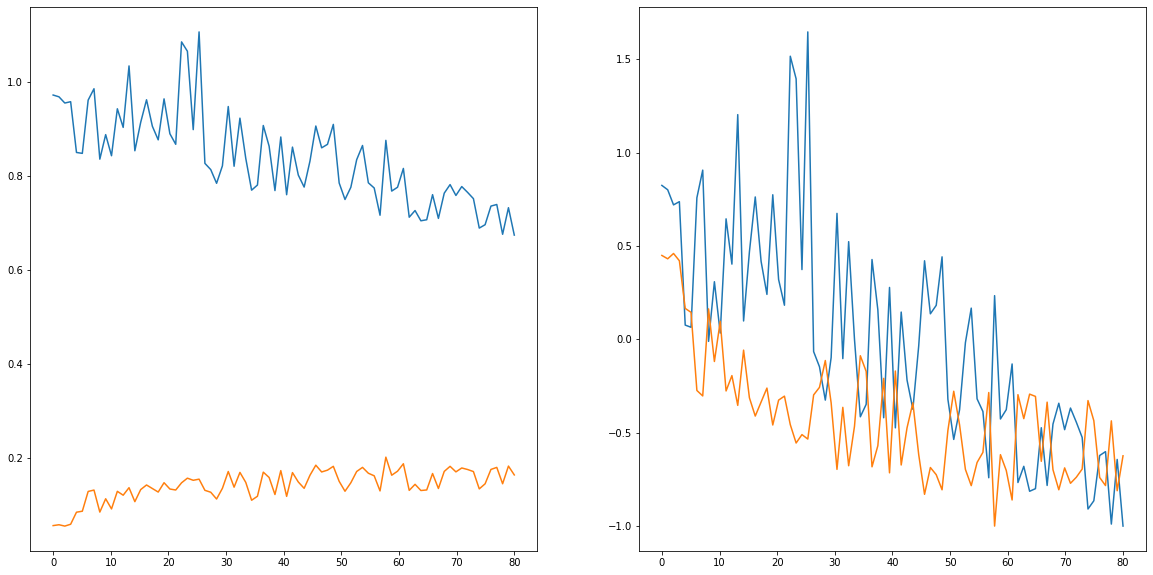

In [34]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xval= np.linspace(0,len(sorted_group), len(sorted_group))
ax2.plot(xval, sorted_group.normed_etot)
ax2.plot(xval, sorted_group.normed_RMSE)

ax.plot(xval, sorted_group.E_tot)
ax.plot(xval, sorted_group.RMSE)

In [35]:
last_output_dict_list = []
for label, group in sorted_group.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument']):

    last_output_dict_list.append(group.sort_values(by = 'new_distance').iloc[0].to_dict())

In [36]:
last_df = pd.DataFrame(last_output_dict_list).sort_values(by = 'new_distance')
last_df[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'new_distance', 'img_wavelength', 'xrs_wavelength', 'zoom_in_type','normed_etot','normed_RMSE']]

,RMSE,pears_corr,p_val,MSE,vector_fit,E_tot,best_fit,new_distance,img_wavelength,xrs_wavelength,zoom_in_type,normed_etot,normed_RMSE
11,0.055236,0.978958,7.744184e-28,0.003051,1.000110,0.971468,0.107971,0.288684,131,B,"(100,)",0.825292,0.450101
1,0.083738,0.951050,5.627331e-21,0.007012,1.000128,0.849250,0.290578,0.622383,131,A,"(100,)",0.076922,0.166350
10,0.127910,0.880440,7.022431e-14,0.016361,1.000106,0.960661,0.303276,0.650745,94,B,"(80,)",0.759119,-0.273404
5,0.112314,0.902178,1.885788e-15,0.012614,1.000156,0.887194,0.335712,0.658961,304,A,"(100,)",0.309264,-0.118139
15,0.135927,0.863462,7.502828e-13,0.018476,1.000141,1.033395,0.324477,0.687684,304,B,"(150,)",1.204484,-0.353211
12,0.141679,0.850842,3.585954e-12,0.020073,1.000130,0.961361,0.349679,0.718971,171,B,"(80,)",0.763405,-0.410479
13,0.133093,0.875030,1.550077e-13,0.017714,1.000120,0.889106,0.386791,0.747048,193,B,"(50,)",0.320968,-0.324998
14,0.151656,0.831462,3.055084e-11,0.023000,1.000123,0.897835,0.445481,0.821471,211,B,"(50,)",0.374419,-0.509803
2,0.126240,0.882346,5.264001e-14,0.015936,1.000142,0.812805,0.447167,0.852523,171,A,"(80,)",-0.146238,-0.256774
19,0.111790,0.859981,2.570809e-23,0.012497,1.001308,0.783614,0.481999,0.868011,TM,B,"(100,)",-0.324982,-0.112918


<ipython-input-37-5048ecb052a5>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-37-5048ecb052a5>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-37-5048ecb052a5>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-37-5048ecb052a5>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-37-5048ecb052a5>:8: MatplotlibDeprecationWarning: Pas

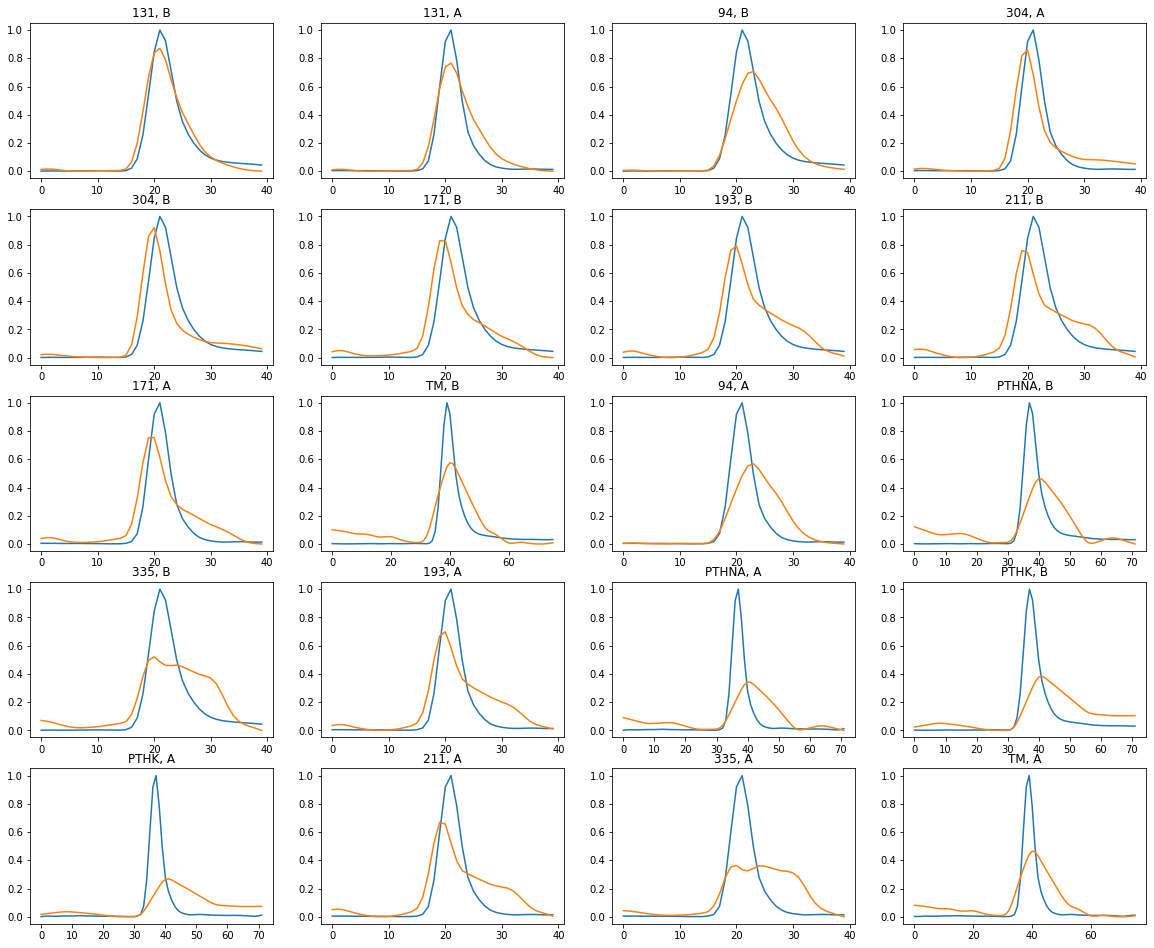

In [37]:
fig = plt.figure(figsize = (20,20))

ax_x = len(origi_lasso_fit)/3

num = 1
for _, row in last_df.sort_values(by = 'new_distance').iterrows():

    ax = fig.add_subplot(ax_x, 4, num)

    xray = row['xray_data']
    signal = row['linear_combo_fit']



    ax.plot(xray)
    ax.plot(signal)

    img, xrs = row['img_wavelength'], row['xrs_wavelength']

    ax.set_title(f'{img}, {xrs}')
    num = num+1

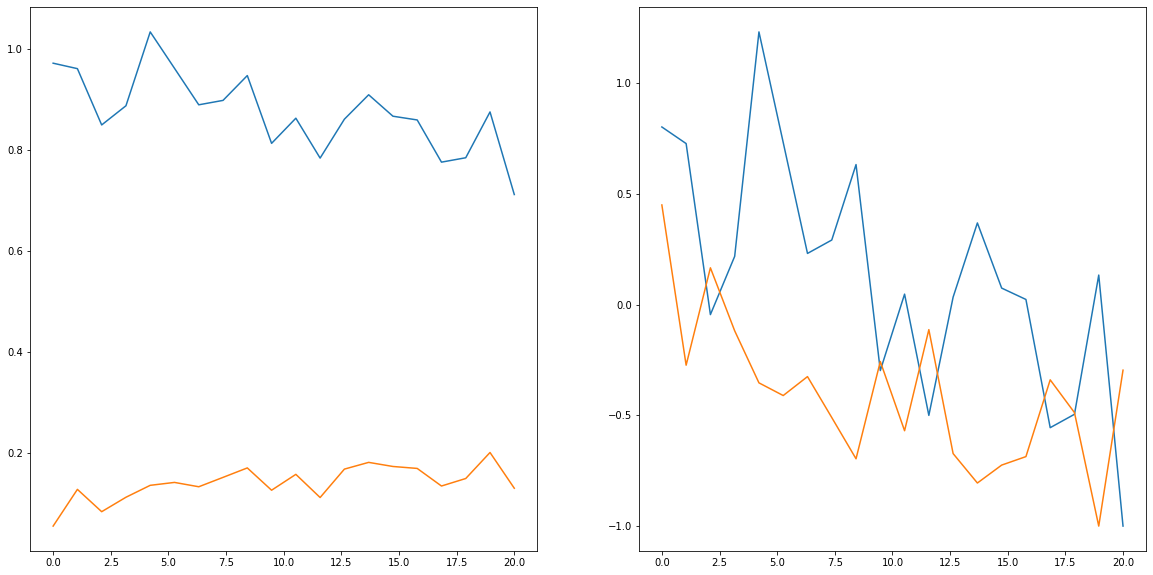

In [38]:
last_df['normed_etot'] = normalize_map_to_neg1_and_1_2(last_df.E_tot,1)
last_df['normed_RMSE'] = normalize_map_to_neg1_and_1(last_df.RMSE,0)

last_df['new_distance'] = [new_distance(this_row) for _, this_row in last_df.iterrows()]

last_sorted_group = last_df.sort_values(by = 'new_distance')

last_sorted_group

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xval= np.linspace(0,len(last_sorted_group), len(last_sorted_group))
ax2.plot(xval, last_sorted_group.normed_etot)
ax2.plot(xval, last_sorted_group.normed_RMSE)

ax.plot(xval, last_sorted_group.E_tot)
ax.plot(xval, last_sorted_group.RMSE)


<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Pas

<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-39-6906d6684f91>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)


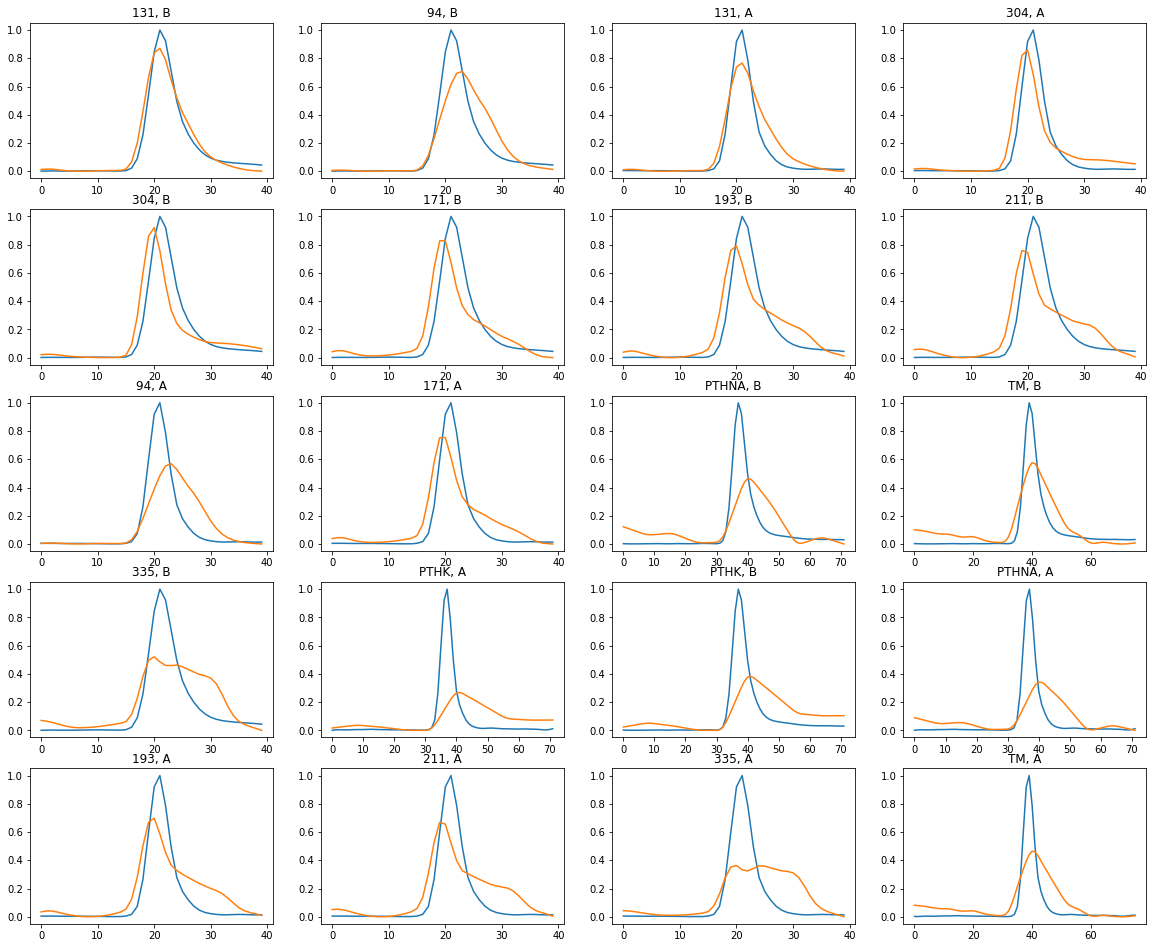

In [39]:
fig = plt.figure(figsize = (20,20))

ax_x = len(last_sorted_group)/3

num = 1
for _, row in last_sorted_group.sort_values(by = 'new_distance').iterrows():

    ax = fig.add_subplot(ax_x, 4, num)

    xray = row['xray_data']
    signal = row['linear_combo_fit']



    ax.plot(xray)
    ax.plot(signal)

    img, xrs = row['img_wavelength'], row['xrs_wavelength']

    ax.set_title(f'{img}, {xrs}')
    num = num+1


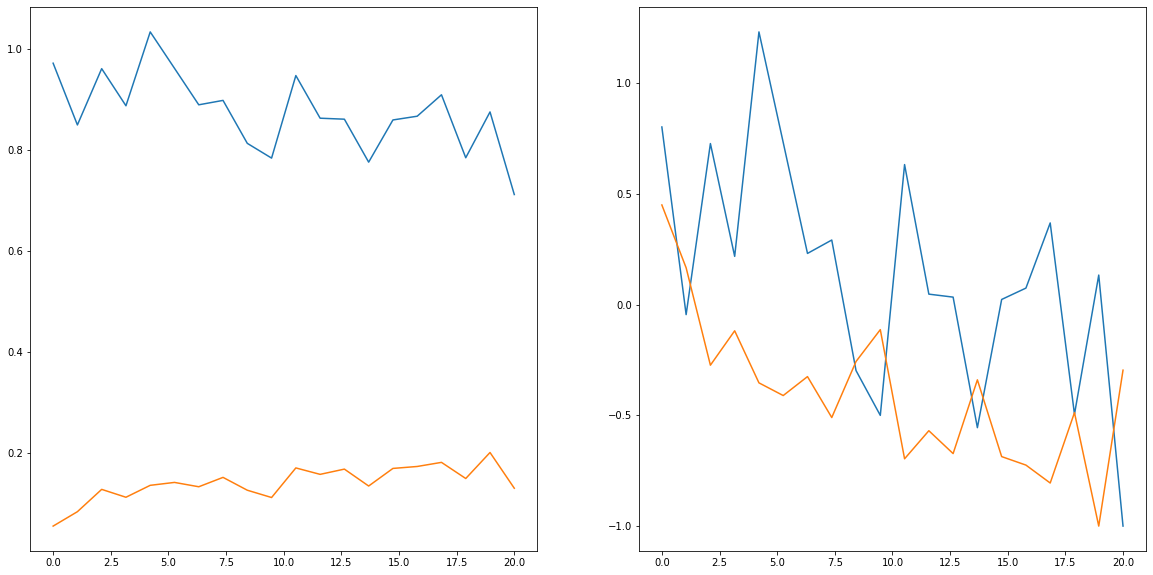

In [40]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xval= np.linspace(0,len(last_df), len(last_df))
ax2.plot(xval, last_df.normed_etot)
ax2.plot(xval, last_df.normed_RMSE)

ax.plot(xval, last_df.E_tot)
ax.plot(xval, last_df.RMSE)

In [71]:
# compar new_distance optimal fits to original_distance optimal fits

# original optimized data set called: origi_lasso_fit

# last new normed called: last_df

# normed again after last normed called: last_sorted_group

columns_to_check_diff = ['lamda', 'zoom_in_type', 'xrs_wavelength', 'img_wavelength']

# Calculate the difference between the selected columns
A = origi_lasso_fit[columns_to_check_diff].iloc[:1]
B = last_df[columns_to_check_diff].iloc[:1]



In [72]:
old = A.to_dict('records')[0]
old

{'lamda': 0.001,
 'zoom_in_type': (100,),
 'xrs_wavelength': 'B',
 'img_wavelength': 131}

In [74]:
old = A.to_dict('records')[0]
old
new = B.to_dict('records')[0]
new
for key in columns_to_check_diff:

    old_val = old[key]
    new_val = new[key]

    if old_val == new_val:
        print(f'{key} ok')
    else:
        print(f'{key} not ok')

{'lamda': 0.001,
 'zoom_in_type': (100,),
 'xrs_wavelength': 'B',
 'img_wavelength': 131}

In [75]:
for key in columns_to_check_diff:

    old_val = old[key]
    new_val = new[key]

    if old_val == new_val:
        print(f'{key} ok')
    else:
        print(f'{key} not ok')


lamda ok
zoom_in_type ok
xrs_wavelength ok
img_wavelength ok


<Figure size 720x720 with 0 Axes>

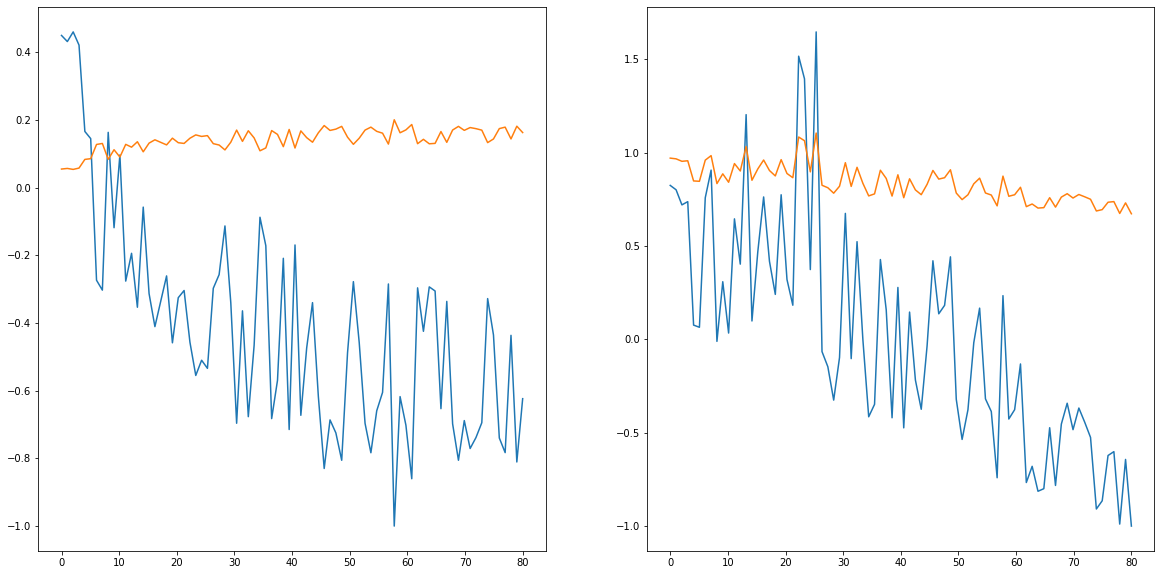

In [44]:
sorted_group

fig = plt.figure(figsize = (10,10))
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xval= np.linspace(0,len(sorted_group), len(sorted_group))
ax2.plot(xval, sorted_group.normed_etot)
ax.plot(xval, sorted_group.normed_RMSE)

ax2.plot(xval, sorted_group.E_tot)
ax.plot(xval, sorted_group.RMSE)

In [ ]:
# under this is exploratory

In [45]:
first_df['normed_etot'] = normalize_map_to_neg1_and_1(first_df.E_tot,1)
first_df['normed_RMSE'] = normalize_map_to_neg1_and_1(first_df.RMSE,0)

first_df['new_distance'] = [new_distance(this_row) for _, this_row in first_df.iterrows()]

sorted_group = first_df.sort_values(by = 'new_distance')

print(len(first_df), first_df.E_tot.to_list(), first_df.normed_etot.to_list())
print(len(first_df), first_df.RMSE.to_list(), first_df.normed_RMSE.to_list())

80 [0.9469814543897784, 0.9222429790927159, 0.9066031444161404, 0.8821807229511898, 0.8422879285194916, 0.8473279759136357, 0.8492498882161102, 0.8349985923379811, 0.8208429489694209, 0.8128051305954825, 0.7681636675262223, 0.7038499615569337, 0.7756089502921015, 0.7492043160481927, 0.7156791478885136, 0.6751333897593529, 0.7843254080102925, 0.7256725827774863, 0.6955267789843639, 0.673375075095277, 0.8761056943385281, 0.9025889407636634, 0.8871942163839055, 0.8528538591405181, 0.8750045969000328, 0.8152300569185998, 0.7808701684631338, 0.7316961055933954, 0.7643041246347364, 0.7385260781460475, 0.7766671146252675, 0.9089656246972726, 0.7577493803408978, 0.7509620523017775, 0.8591201655381112, 0.8640848876529559, 0.7089394764170179, 0.6883289255673533, 0.7115021220217632, 0.7061113661077962, 0.9848388692988175, 0.9606611745137938, 0.9422022410543825, 0.9134005304717291, 0.9572503235648194, 0.9676488263751258, 0.9714680656058434, 0.9544348976977949, 0.9632832875441513, 0.961361072200377

In [46]:
second_df = pd.DataFrame(second_sample)

second_df[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'new_distance', 'img_wavelength', 'xrs_wavelength', 'zoom_in_type','normed_etot','normed_RMSE']].sort_values(by = 'new_distance')


KeyError: "None of [Index(['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit', 'E_tot', 'best_fit',\n       'new_distance', 'img_wavelength', 'xrs_wavelength', 'zoom_in_type',\n       'normed_etot', 'normed_RMSE'],\n      dtype='object')] are in the [columns]"

In [396]:
second_df.img_wavelength.value_counts()

304      2
193      2
131      2
PTHNA    2
PTHK     2
TM       2
171      2
211      2
94       2
335      2
Name: img_wavelength, dtype: int64

In [345]:
second_df = pd.DataFrame(second_sample)
# lets third find the best in each and wl pair 
third_sample = []

# for label, group in second_df.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument']):

second_df['normed_etot'] = normalize_map_to_neg1_and_1(second_df.E_tot,1)
second_df['normed_RMSE'] = normalize_map_to_neg1_and_1(second_df.RMSE,0)

second_df['new_distance'] = [new_distance(this_row) for _, this_row in second_df.iterrows()]

sorted_group = second_df.sort_values(by = 'new_distance')
sorted_group[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'new_distance', 'img_wavelength', 'xrs_wavelength', 'zoom_in_type','normed_etot','normed_RMSE']].sort_values(by = 'new_distance')
    # second_sample.append(sorted_group.to_dict())

-59.88957352964354 60.88957352964354
-9.955448961609083 1.0


,RMSE,pears_corr,p_val,MSE,vector_fit,E_tot,best_fit,new_distance,img_wavelength,xrs_wavelength,zoom_in_type,normed_etot,normed_RMSE
10,0.130844,0.873984,1.798991e-13,0.017120,1.000107,0.984839,0.289248,0.796418,94,B,"(50,)",1.907994,-0.302611
11,0.055236,0.978958,7.744184e-28,0.003051,1.000110,0.971468,0.107971,0.897595,131,B,"(100,)",2.708765,0.450101
15,0.135927,0.863462,7.502828e-13,0.018476,1.000141,1.033395,0.324477,1.209320,304,B,"(150,)",-1.000000,-0.353211
12,0.146484,0.839487,1.302149e-11,0.021458,1.000277,0.963283,0.365448,1.321724,171,B,"(50,)",3.198948,-0.458313
0,0.170367,0.748326,2.835973e-08,0.029025,1.000134,0.946981,0.504220,1.804321,94,A,"(50,)",4.175258,-0.696084
7,0.181357,0.428347,1.742603e-04,0.032890,1.000149,0.908966,0.877258,2.885783,PTHK,A,"(150,)",6.452010,-0.805486
16,0.183791,0.736677,5.986027e-08,0.033779,1.003089,0.905521,0.578462,2.976313,335,B,"(50,)",6.658315,-0.829724
5,0.119915,0.886284,2.856538e-14,0.014380,1.000156,0.902589,0.345577,2.977943,304,A,"(80,)",6.833907,-0.193805
14,0.151656,0.831462,3.055084e-11,0.023000,1.000123,0.897835,0.445481,3.152204,211,B,"(50,)",7.118631,-0.509803
13,0.133093,0.875030,1.550077e-13,0.017714,1.000120,0.889106,0.386791,3.386728,193,B,"(50,)",7.641421,-0.324998


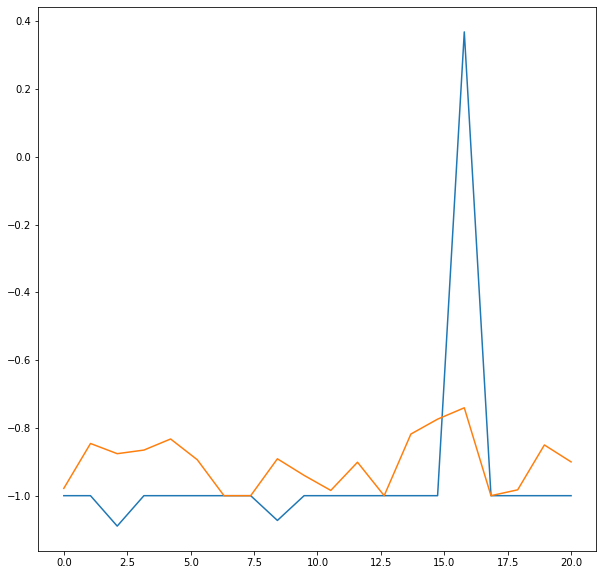

In [368]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
xval= np.linspace(0,len(second_df), len(second_df))
ax.plot(xval, second_df.normed_etot)
ax.plot(xval, second_df.normed_RMSE)

In [313]:
def normalize_values(numbers):
    # Find the max and min values in the list
    max_val = min(numbers)
    min_val = max(numbers)
    
    # Normalize the list based on the above formula
    normalized = []
    for num in numbers:
        normalized_value = 2 * ((num - min_val) / (max_val - min_val)) - 1
        normalized.append(normalized_value)
    
    return normalized

# Example usage:
list_of_numbers = [17, 0.95, 1.5, 2, 1.09, 0.97, 0.24, 0.03]
normalized_list = normalize_values(list_of_numbers)
print(normalized_list)

[-1.0, 0.8915733647613437, 0.8267530936947556, 0.7678255745433118, 0.8750736593989394, 0.8892162639952861, 0.9752504419563939, 1.0]


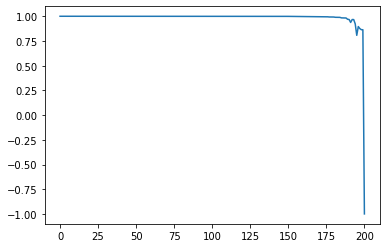

In [251]:
plt.plot(np.linspace(0,len(mask), len(mask)),mask.normed_etot)

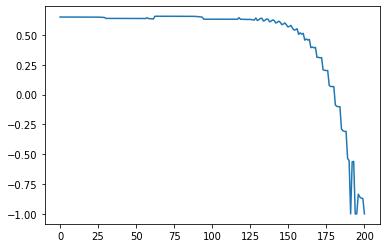

In [252]:
plt.plot(np.linspace(0,len(mask), len(mask)),mask.normed_RMSE)

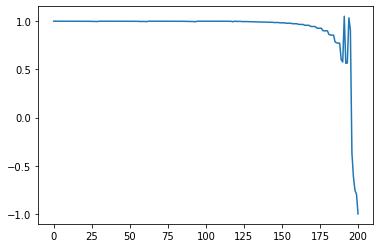

In [253]:
plt.plot(np.linspace(0,len(mask), len(mask)),mask.normed_vtot)

In [85]:
list_of_numbers = mask.E_tot.to_list()
x_max = max(list_of_numbers)
x_opt = 1  # Given optimal value
a = -2 / (x_max - x_opt)
b = 1 + (2 * x_opt) / (x_max - x_opt)

normalized_list_etot = [a * x + b for x in list_of_numbers]
print(normalized_list_etot)

[1.0002911722689736, 1.0002909418126218, 1.0002906632365602, 1.0002903297859396, 1.0002899068208504, 1.000289417913628, 1.0002888269660632, 1.000288115659247, 1.0002872499420534, 1.0002862104497638, 1.0002849570346068, 1.0002834439272743, 1.0002816172373505, 1.0002794128472765, 1.0002767506304184, 1.0002735358805228, 1.000269653230718, 1.000264961490499, 1.0002592965306571, 1.0002524523348624, 1.000244188353484, 1.0002341797926346, 1.0002220864709443, 1.0002074427451868, 1.0001897161460584, 1.0001682412439388, 1.000142203401216, 1.0001106012409937, 1.0000721983916332, 1.000025457377277, 1.0003313867611598, 1.00033115827648, 1.000330882608074, 1.0003305498836952, 1.0003301481244904, 1.0003296640624082, 1.000329074900525, 1.0003283694232343, 1.0003275166311933, 1.0003264885933454, 1.0003252476026834, 1.0003237500819218, 1.000321942062249, 1.000319759257737, 1.0003171227930474, 1.0003139401708483, 1.0003100966531633, 1.00030545431433, 1.0002998461285044, 1.0002930696822567, 1.000284881764

In [86]:
result_list = [1 - x for x in normalized_list_etot]

In [87]:
mask['etot_calc'] = [(this_x**2)/4 for this_x in normalized_list_etot]

<ipython-input-87-08834febc0e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['etot_calc'] = [(this_x**2)/4 for this_x in normalized_list_etot]


In [91]:
list_of_numbers_rmse = mask.RMSE.to_list()
x_max = max(list_of_numbers)
x_opt = 0  # Given optimal value
a = -2 / (x_max - x_opt)
b = 1 + (2 * x_opt) / (x_max - x_opt)

normalized_list_rmse = [a * x + b for x in list_of_numbers_rmse]
print(normalized_list_rmse)

[0.9994391712868592, 0.9994391712364366, 0.999439171162667, 0.9994391710559214, 0.9994391708916102, 0.9994391706614072, 0.9994391703255275, 0.9994391698376139, 0.9994391691205855, 0.9994391680810104, 0.999439166568458, 0.9994391643655175, 0.999439161157095, 0.9994391564866317, 0.9994391496833397, 0.9994391397751892, 0.9994391253443474, 0.9994391043178297, 0.9994390737118429, 0.9994390291482385, 0.9994389643255708, 0.9994388697718699, 0.9994387322259908, 0.9994385318244231, 0.9994382401243455, 0.9994378155908863, 0.9994371979043525, 0.9994362995549483, 0.9994349937799705, 0.9994330972238896, 0.9994207763302829, 0.9994207762814955, 0.9994207762103955, 0.9994207761067583, 0.9994207759556446, 0.9994207757358413, 0.999420775412689, 0.999420774945419, 0.9994207742637647, 0.9994207732721586, 0.9994207718279168, 0.9994207697253434, 0.9994207666629792, 0.9994207622031409, 0.9994207557055051, 0.999420746245297, 0.9994207324681377, 0.9994207124042341, 0.9994206831851736, 0.9994206406341637, 0.999

In [89]:
mask['new_distance'] = [new_distance(this_row) for _, this_row in mask.iterrows()]

<ipython-input-89-a2d00b61c560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['new_distance'] = [new_distance(this_row) for _, this_row in mask.iterrows()]


In [90]:
mask.sort_values(by = 'new_distance')

,lamda,coeff,img_wavelength,img_telescope,img_instrument,xrs_instrument,xrs_wavelength,xrs_telescope,zoom_in_type,resampled_file,...,vector_fit,E_tot,xray_data,linear_combo_fit,resampled_time_stamp,best_fit,cluster_matrix,zoom_lasso_run_time,etot_calc,new_distance
0,0.232995,[0.8498149018181755],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,1.026957,0.979930,"[0.0008479993662036641, 0.0016991879683441612,...","[0.020185131754182614, 0.022252021150521356, 0...","[1297198275, 1297198335, 1297198395, 129719845...",0.124659,"[[0.020185131754182614, 0.022252021150521356, ...",0.016016,0.250102,0.251743
0,0.193070,[0.8537411978107208],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,1.022234,0.975423,"[0.0008479993662036641, 0.0016991879683441612,...","[0.020278390652968555, 0.02235482944593063, 0....","[1297198275, 1297198335, 1297198395, 129719845...",0.124231,"[[0.020278390652968555, 0.02235482944593063, 0...",0.016090,0.250125,0.251744
0,0.281177,[0.845073798544605],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,1.032719,0.985427,"[0.0008479993662036641, 0.0016991879683441612,...","[0.020072519238171823, 0.022127877492773555, 0...","[1297198275, 1297198335, 1297198395, 129719845...",0.125231,"[[0.020072519238171823, 0.022127877492773555, ...",0.016141,0.250074,0.251744
0,0.159986,[0.8569941033936634],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,1.018354,0.971721,"[0.0008479993662036641, 0.0016991879683441612,...","[0.02035565492267615, 0.022440005316202407, 0....","[1297198275, 1297198335, 1297198395, 129719845...",0.123907,"[[0.02035565492267615, 0.022440005316202407, 0...",0.016107,0.250144,0.251747
0,0.132571,[0.8596895170850728],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,1.015161,0.968674,"[0.0008479993662036641, 0.0016991879683441612,...","[0.02041967742966764, 0.022510583511927525, 0....","[1297198275, 1297198335, 1297198395, 129719845...",0.123661,"[[0.02041967742966764, 0.022510583511927525, 0...",0.015904,0.250160,0.251749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,6.866488,[0.19815426531090888],131,SDO,AIA,XRS,B,goes15,"(100,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,4.392520,4.266722,"[0.0008479993662036641, 0.0016991879683441612,...","[0.002846949594581134, 0.003494101140757787, 0...","[1297198275, 1297198335, 1297198395, 129719845...",6.987506,"[[0.002846949594581134, 0.003494101140757787, ...",0.017138,0.233609,0.271478
0,6.866488,[0.19762017930307993],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,4.416166,4.213936,"[0.0008479993662036641, 0.0016991879683441612,...","[0.004693950821506465, 0.005174595550411784, 0...","[1297198275, 1297198335, 1297198395, 129719845...",6.957566,"[[0.004693950821506465, 0.005174595550411784, ...",0.016025,0.233870,0.271638
0,10.000000,[1.0286636448331004e-09],131,SDO,AIA,XRS,B,goes15,"(80,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.730365,8.548259,"[0.0008479993662036641, 0.0016991879683441612,...","[1.3323608374374739e-11, 1.683004599245024e-11...","[1297198275, 1297198335, 1297198395, 129719845...",8.255949,"[[1.3323608374374739e-11, 1.683004599245024e-1...",0.016000,0.212968,0.279842
0,10.000000,[8.497179925835573e-10],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.598840,7.082583,"[0.0008479993662036641, 0.0016991879683441612,...","[2.018282992861474e-11, 2.2249483625780625e-11...","[1297198275, 1297198335, 1297198395, 129719845...",6.919224,"[[2.018282992861474e-11, 2.2249483625780625e-1...",0.015982,0.219926,0.282885


In [84]:


# Find the smallest value in the list
smallest_value = min(squared_list)

# Find the index of the smallest value
smallest_index = squared_list.index(smallest_value)

mask.iloc[smallest_index]

lamda                                                               0.409492
coeff                                                   [0.8324641343468602]
img_wavelength                                                           131
img_telescope                                                            SDO
img_instrument                                                           AIA
xrs_instrument                                                           XRS
xrs_wavelength                                                             B
xrs_telescope                                                         goes15
zoom_in_type                                                          (150,)
resampled_file             /mnt/e/ALEXIS_data/flare_candidates/flarecandi...
gridsearch_clusters                                                     (0,)
hpc_coord_tuple                    ((877.4710768447218, 311.1732609777036),)
pix_coord_tuple                  ((3510.9517947412032, 2567.1221016295062),)

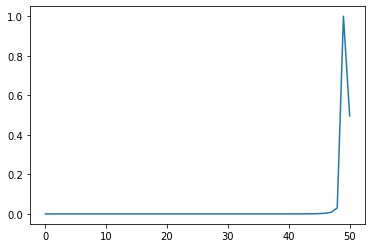

In [73]:
plt.plot(np.linspace(0,len(mask), len(mask)), squared_list)

(0.0, 2.5)

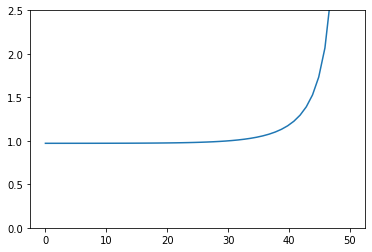

In [52]:
plt.plot(np.linspace(0,len(mask), len(mask)), mask.E_tot)
plt.ylim(0,2.5)

In [23]:
list_of_numbers = [17, 0.95, 1.5, 2, 1.09, 0.97, 0.24]
x_max = max(list_of_numbers)
x_opt = 1  # Given optimal value
a = -2 / (x_max - x_opt)
b = 1 + (2 * x_opt) / (x_max - x_opt)

normalized_list = [a * x + b for x in list_of_numbers]
print(normalized_list)

(60576.648368119335, 0.0019497253715755262)

In [25]:
all_fits.E_tot.std(), all_fits.E_tot.var()

(1013.0321480097994, 1026234.132901348)

<ipython-input-9-7bae3962402c>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-7bae3962402c>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-7bae3962402c>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-7bae3962402c>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-9-7bae3962402c>:8: MatplotlibDeprecationWarning: Passing 

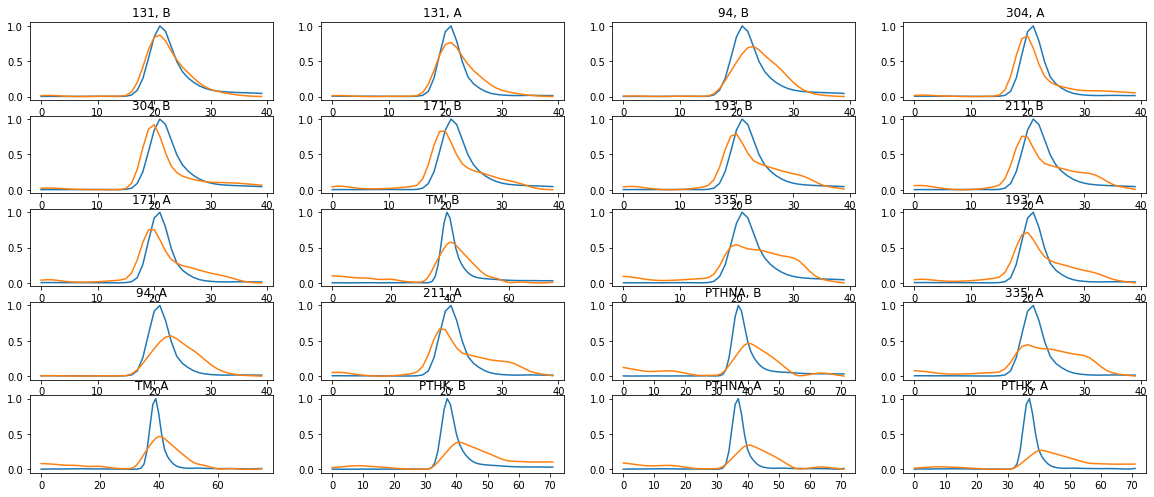

In [9]:
fig = plt.figure(figsize = (20,10))

ax_x = len(origi_lasso_fit)/3

num = 1
for _, row in origi_lasso_fit.sort_values(by = 'new_distance').iterrows():

    ax = fig.add_subplot(ax_x, 4, num)

    xray = row['xray_data']
    signal = row['linear_combo_fit']



    ax.plot(xray)
    ax.plot(signal)

    img, xrs = row['img_wavelength'], row['xrs_wavelength']

    ax.set_title(f'{img}, {xrs}')
    num = num+1

    

In [10]:
pickle.load(open(glob_lasso_files[0], 'rb'))[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'img_wavelength', 'xrs_wavelength']].sort_values(by = 'best_fit')

NameError: name 'glob_lasso_files' is not defined

In [18]:
def new_distance(row):

    RMSE, E_tot, pears = row['RMSE'], row['E_tot'], row['pears_corr']

    new_dist = (((RMSE**2) + (E_tot -1)**2 + ((pears - 1)**2))/4)**(1/2)

    return(new_dist)

In [19]:
lasso_fit['new_distance'] = [new_distance(row) for _, row in lasso_fit.iterrows()]

In [28]:
lasso_fit[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'new_distance', 'img_wavelength', 'xrs_wavelength']].sort_values(by = 'new_distance')

,RMSE,pears_corr,p_val,MSE,vector_fit,E_tot,best_fit,new_distance,img_wavelength,xrs_wavelength
0,0.055898,0.979442,2.508733e-27,0.003125,1.000110,0.967416,0.112274,0.067889,131,B
0,0.083679,0.951433,1.600657e-20,0.007002,1.000130,0.842828,0.296551,0.184564,131,A
0,0.111635,0.902794,3.961744e-15,0.012462,1.000162,0.885507,0.335958,0.187136,304,A
0,0.137008,0.867055,9.496772e-13,0.018771,1.000107,0.989454,0.299377,0.191198,94,B
0,0.138766,0.863701,1.461926e-12,0.019256,1.000139,1.035894,0.330355,0.197792,304,B
0,0.141744,0.854659,2.269299e-12,0.020091,1.000137,0.973342,0.333972,0.204759,171,B
0,0.134222,0.879966,1.607524e-13,0.018016,1.000123,0.880323,0.392072,0.216209,193,B
0,0.122367,0.885471,3.246933e-14,0.014974,1.000151,0.820345,0.431675,0.245696,171,A
0,0.151123,0.838904,1.387580e-11,0.022838,1.000123,0.888076,0.447105,0.247623,211,B
0,0.127251,0.892962,2.162163e-14,0.016193,1.000142,0.756767,0.493857,0.294639,193,A


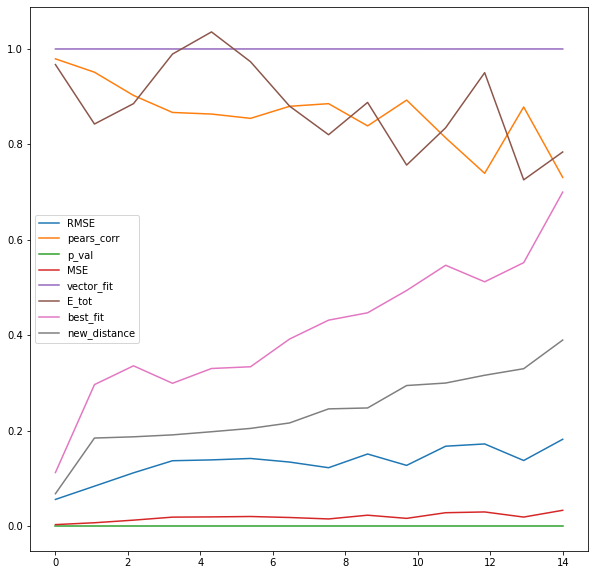

<ipython-input-50-e17a426d681e>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-50-e17a426d681e>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-50-e17a426d681e>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-50-e17a426d681e>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-50-e17a426d681e>:8: MatplotlibDeprecationWarning: Pas

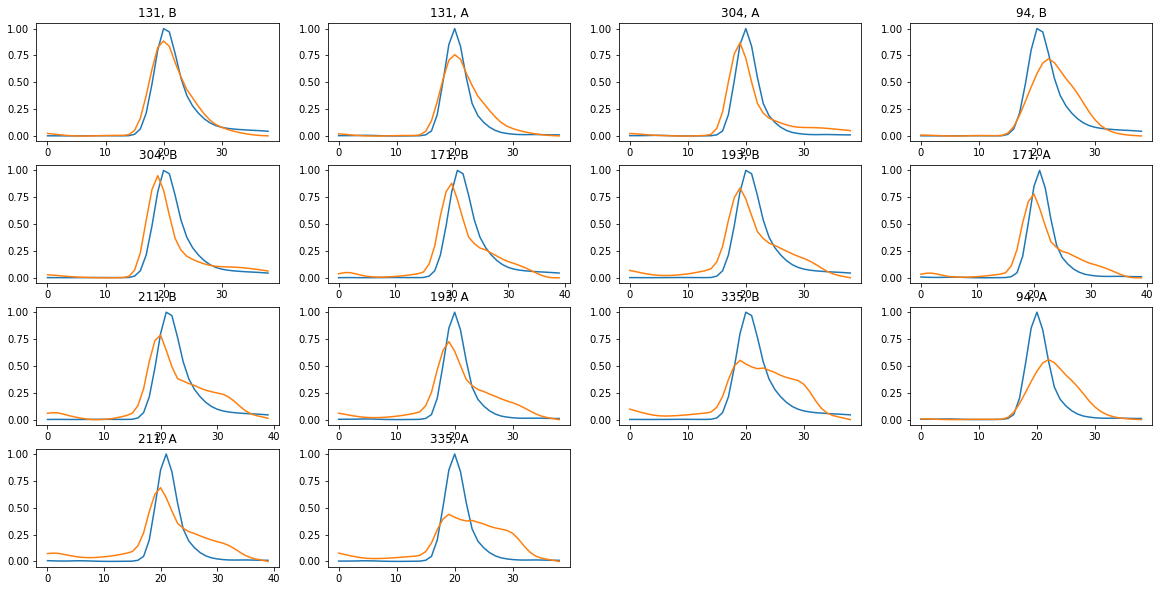

In [29]:
lasso_fit.iloc[0].cluster_matrix

array([[2.37919755e-02, 1.86026538e-02, 1.25468246e-02, 6.95285341e-03,
        2.81845635e-03, 7.65587028e-04, 0.00000000e+00, 2.69862852e-04,
        1.37432180e-03, 2.80499914e-03, 4.19951970e-03, 5.21119588e-03,
        5.46014968e-03, 5.80114075e-03, 1.19863063e-02, 5.17343666e-02,
        1.65066506e-01, 3.74907760e-01, 6.19073885e-01, 8.24896759e-01,
        8.84462476e-01, 8.34439611e-01, 6.83144498e-01, 5.50872601e-01,
        4.32355856e-01, 3.55155182e-01, 2.76785898e-01, 2.05820661e-01,
        1.47420282e-01, 1.06955481e-01, 8.11621688e-02, 6.14805391e-02,
        4.59433121e-02, 3.31352108e-02, 2.25734178e-02, 1.38564802e-02,
        7.54872170e-03, 3.80667683e-03, 1.30517256e-03]])

In [53]:
# lets try to normalize over the sample

all_lasso_file = 'v3_LASSO_df.pickle'


glob_lasso_files = glob(f'{dataconfig.DATA_DIR_FLARE_CANDIDATES}/*/{all_lasso_file}')
glob_lasso_files

['/mnt/e/ALEXIS_data/flare_candidates/flarecandidate_C4.0_at_2011-02-08T21_11_00_08.working/v3_LASSO_df.pickle']

In [56]:
all_fits = pickle.load(open(glob_lasso_files[0], 'rb'))

In [408]:
normed_df = []

for label, group in all_fits.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument', 'zoom_in_type']):

    e_max, e_min, e_mean = np.max(group.E_tot),np.min(group.E_tot), np.mean(group.E_tot)

    group['normed_e'] = [(this_e-e_mean)/(e_max - e_min) for this_e in group.E_tot]
    # group['normed_e'] = [(this_e/e_max) for this_e in group.E_tot]
    normed_df.append(group)


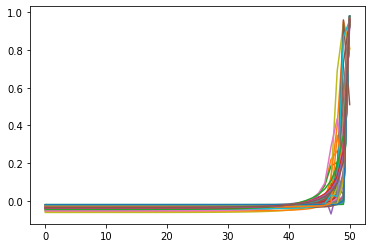

In [409]:
for label, group in pd.concat(normed_df).groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument', 'zoom_in_type']):
    plt.plot(np.linspace(0,len(group), len(group)), group.normed_e)

In [458]:
def new_distance_normed(row, max_e, min_e, max_RMSE, min_RMSE):

    # print(row)

    RMSE, E_tot, pears = row['RMSE'], row['E_tot'], row['pears_corr']

    # print(RMSE, E_tot, pears)
    # print(E_tot, min_e, max_e)

    # normed_RMSE = (2*(RMSE-max_RMSE)/(max_RMSE + min_RMSE)) -1
    # normed_etot = (2*(E_tot-min_e)/(max_e - min_e))-1
    # normed_etot =1

    # print(normed_RMSE,normed_etot)

    new_dist = (((RMSE)**2) + (((E_tot)-1)**2) + (((pears - 1)**2)/4))**(1/2)

    # print(new_dist)

    return(new_dist)

In [1]:
new_group_list = []
for label, group in all_fits.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument']):


    max_e, min_e, max_RMSE, min_RMSE = np.max(group.E_tot),np.min(group.E_tot),np.max(group.RMSE),np.min(group.RMSE)

    # print(max_e, min_e, max_RMSE, min_RMSE)

    # group['normed_etot'] =  [(2*(E_tot-min_e)/(max_e - min_e))+1 for E_tot in group['E_tot']]

    group['new_distance'] = [new_distance_normed(row, max_e, min_e, max_RMSE, min_RMSE ) for _, row in group.iterrows()]

    # print(group['new_distance'])

    new_group_list.append(group)



NameError: name 'all_fits' is not defined

In [460]:
best_fit = pd.concat(new_group_list)
best_fit

,lamda,coeff,img_wavelength,img_telescope,img_instrument,xrs_instrument,xrs_wavelength,xrs_telescope,zoom_in_type,resampled_file,...,MSE,vector_fit,E_tot,xray_data,linear_combo_fit,resampled_time_stamp,best_fit,cluster_matrix,zoom_lasso_run_time,new_distance
0,0.001000,[0.5584485083789728],94,SDO,AIA,XRS,A,goes15,"(50,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.029648,1.000138,0.950411,"[0.003336032322937968, 0.003308416201051761, 0...","[0.006854633549384047, 0.00618507506246551, 0....","[1297198322, 1297198382, 1297198442, 129719850...",0.512065,"[[0.006854633549384047, 0.00618507506246551, 0...",0.033766,0.221523
0,0.001207,[0.5584324653224255],94,SDO,AIA,XRS,A,goes15,"(50,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.029648,1.000167,0.950439,"[0.003336032322937968, 0.003308416201051761, 0...","[0.006854436630112183, 0.006184897378207271, 0...","[1297198322, 1297198382, 1297198442, 129719850...",0.512067,"[[0.006854436630112183, 0.006184897378207271, ...",0.019383,0.221517
0,0.001456,[0.5584132140077074],94,SDO,AIA,XRS,A,goes15,"(50,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.029648,1.000201,0.950472,"[0.003336032322937968, 0.003308416201051761, 0...","[0.006854200331320519, 0.0061846841610085565, ...","[1297198322, 1297198382, 1297198442, 129719850...",0.512068,"[[0.006854200331320519, 0.0061846841610085565,...",0.018432,0.221510
0,0.001758,[0.558389711145066],94,SDO,AIA,XRS,A,goes15,"(50,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.029648,1.000243,0.950512,"[0.003336032322937968, 0.003308416201051761, 0...","[0.0068539118472286985, 0.006184423855953679, ...","[1297198322, 1297198382, 1297198442, 129719850...",0.512071,"[[0.0068539118472286985, 0.006184423855953679,...",0.018217,0.221501
0,0.002121,[0.5583616951381845],94,SDO,AIA,XRS,A,goes15,"(50,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.029648,1.000294,0.950559,"[0.003336032322937968, 0.003308416201051761, 0...","[0.006853567966892717, 0.006184113565742652, 0...","[1297198322, 1297198382, 1297198442, 129719850...",0.512073,"[[0.006853567966892717, 0.006184113565742652, ...",0.018129,0.221490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,8.286428,[0.12432931250385076],335,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.074500,4.417434,3.483873,"[0.0017047256770639555, 0.0018578491867942556,...","[0.03306875851399531, 0.02965552474691964, 0.0...","[1297198322, 1297198382, 1297198442, 129719850...",6.421098,"[[0.03306875851399531, 0.02965552474691964, 0....",0.017851,2.500310
0,10.000000,[0.06300046106213496],335,SDO,AIA,XRS,B,goes15,"(50,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.087354,7.326606,6.688353,"[0.0017047256770639555, 0.0018578491867942556,...","[0.007917511496290514, 0.006406067473354732, 0...","[1297198322, 1297198382, 1297198442, 129719850...",12.671489,"[[0.007917511496290514, 0.006406067473354732, ...",0.016736,5.697669
0,10.000000,[0.04899669341181881],335,SDO,AIA,XRS,B,goes15,"(80,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.091580,10.802109,9.358641,"[0.0017047256770639555, 0.0018578491867942556,...","[0.006797777029454691, 0.005480511787924285, 0...","[1297198322, 1297198382, 1297198442, 129719850...",18.766130,"[[0.006797777029454691, 0.005480511787924285, ...",0.017215,8.364784
0,10.000000,[0.04283790348258116],335,SDO,AIA,XRS,B,goes15,"(100,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.093338,12.890265,10.761972,"[0.0017047256770639555, 0.0018578491867942556,...","[0.00756734916130299, 0.006375791821928425, 0....","[1297198322, 1297198382, 1297198442, 129719850...",22.237227,"[[0.00756734916130299, 0.006375791821928425, 0...",0.018328,9.767195


In [461]:
# for label, group in pd.concat(normed_df).groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument', 'zoom_in_type']):
#     plt.plot(np.linspace(0,len(group), len(group)), group.normed_e)

In [462]:
best_val = []


for label, group in best_fit.groupby(['xrs_wavelength', 'xrs_telescope', 'xrs_instrument', 'img_wavelength', 'img_telescope', 'img_instrument']):

    ordered_group = group.sort_values(by = 'new_distance')

    best_val.append(ordered_group.iloc[0].to_dict())





In [463]:
lasso_fit = pd.DataFrame(best_val).sort_values(by = 'new_distance')
lasso_fit

,lamda,coeff,img_wavelength,img_telescope,img_instrument,xrs_instrument,xrs_wavelength,xrs_telescope,zoom_in_type,resampled_file,...,MSE,vector_fit,E_tot,xray_data,linear_combo_fit,resampled_time_stamp,best_fit,cluster_matrix,zoom_lasso_run_time,new_distance
8,0.339322,[0.8533607722488263],131,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.003144,1.039409,0.992410,"[0.0017047256770639555, 0.0018578491867942556,...","[0.029271561544132643, 0.023591106571375, 0.01...","[1297198322, 1297198382, 1297198442, 129719850...",0.125591,"[[0.029271561544132643, 0.023591106571375, 0.0...",0.016846,0.057404
1,1.048113,[0.6538377391621514],131,SDO,AIA,XRS,A,goes15,"(100,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.008392,1.158188,0.976026,"[0.003336032322937968, 0.003308416201051761, 0...","[0.01758818706798082, 0.013751987691436979, 0....","[1297198322, 1297198382, 1297198442, 129719850...",0.330730,"[[0.01758818706798082, 0.013751987691436979, 0...",0.017083,0.097758
5,0.868511,[0.7444490929983908],304,SDO,AIA,XRS,A,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.012523,1.158168,0.986855,"[0.003336032322937968, 0.003308416201051761, 0...","[0.0220701656364986, 0.019400120816370006, 0.0...","[1297198322, 1297198382, 1297198442, 129719850...",0.379648,"[[0.0220701656364986, 0.019400120816370006, 0....",0.016812,0.120232
2,1.526418,[0.5991815736258969],171,SDO,AIA,XRS,A,goes15,"(100,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.017279,1.290680,0.997931,"[0.007325478092109763, 0.005334693265005429, 0...","[0.043798074585256655, 0.05002728715711904, 0....","[1297198262, 1297198322, 1297198382, 129719844...",0.537964,"[[0.043798074585256655, 0.05002728715711904, 0...",0.016834,0.140039
7,0.339322,[0.6906514577920394],94,SDO,AIA,XRS,B,goes15,"(80,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.018011,1.037204,0.996699,"[0.0017047256770639555, 0.0018578491867942556,...","[0.009784656946386796, 0.008539420753441282, 0...","[1297198322, 1297198382, 1297198442, 129719850...",0.318506,"[[0.009784656946386796, 0.008539420753441282, ...",0.017432,0.148248
10,0.868511,[0.7468731112271074],193,SDO,AIA,XRS,B,goes15,"(80,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.019016,1.120325,0.986127,"[0.0017047256770639555, 0.0018578491867942556,...","[0.06133995235184256, 0.05162000257481201, 0.0...","[1297198322, 1297198382, 1297198442, 129719850...",0.411149,"[[0.06133995235184256, 0.05162000257481201, 0....",0.017040,0.151033
9,0.596362,[0.8074713556874956],171,SDO,AIA,XRS,B,goes15,"(100,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.018702,1.084269,0.991131,"[0.0011589673748063445, 0.0018549911171383254,...","[0.05902332818388713, 0.06741796336906018, 0.0...","[1297198262, 1297198322, 1297198382, 129719844...",0.376278,"[[0.05902332818388713, 0.06741796336906018, 0....",0.016872,0.151183
3,1.526418,[0.5680684798355737],193,SDO,AIA,XRS,A,goes15,"(80,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.019283,1.277961,0.966981,"[0.003336032322937968, 0.003308416201051761, 0...","[0.04665490424263253, 0.03926195219908671, 0.0...","[1297198322, 1297198382, 1297198442, 129719850...",0.576164,"[[0.04665490424263253, 0.03926195219908671, 0....",0.017283,0.152438
12,0.001000,[0.9508985918078942],304,SDO,AIA,XRS,B,goes15,"(150,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.019256,1.000139,1.035894,"[0.0017047256770639555, 0.0018578491867942556,...","[0.02819063065842013, 0.024780133038900927, 0....","[1297198322, 1297198382, 1297198442, 129719850...",0.330355,"[[0.02819063065842013, 0.024780133038900927, 0...",0.026194,0.158709
4,1.842070,[0.5075940318147053],211,SDO,AIA,XRS,A,goes15,"(80,)",/mnt/e/ALEXIS_data/flare_candidates/flarecandi...,...,0.023034,1.353498,0.982201,"[0.007325478092109763, 0.005334693265005429, 0...","[0.054437433230958364, 0.05704475700692482, 0....","[1297198262, 1297198322, 1297198382, 129719844...",0.6

<ipython-input-464-3304a15eabe8>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-464-3304a15eabe8>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-464-3304a15eabe8>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-464-3304a15eabe8>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(ax_x, 4, num)
<ipython-input-464-3304a15eabe8>:8: MatplotlibDeprecationWarning

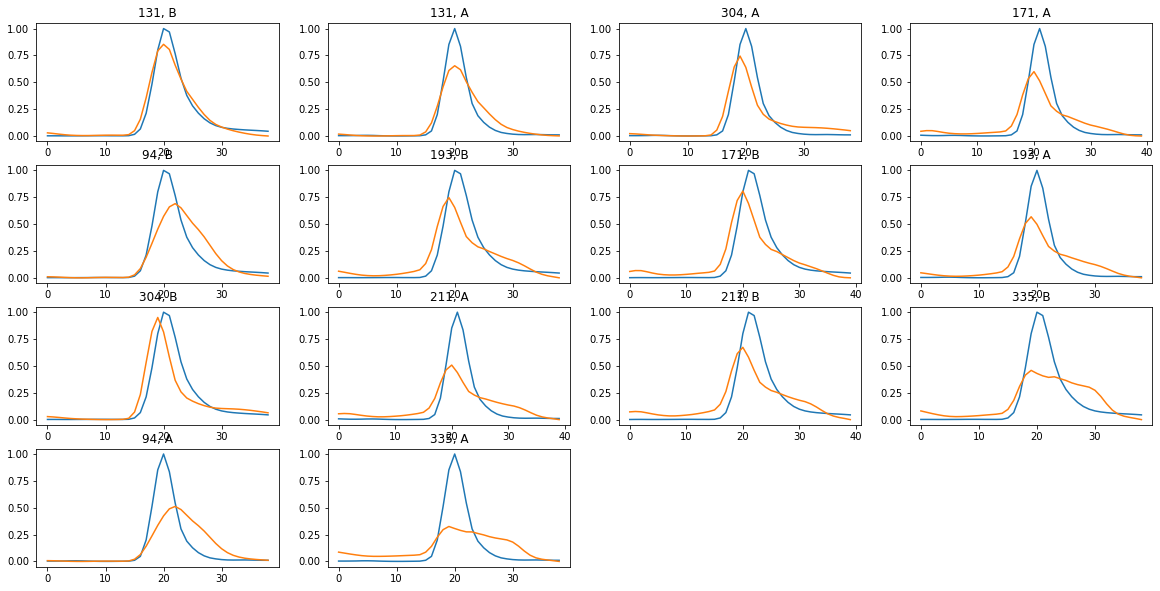

In [464]:

fig = plt.figure(figsize = (20,10))

ax_x = len(lasso_fit)/3

num = 1
for _, row in lasso_fit.sort_values(by = 'new_distance').iterrows():

    ax = fig.add_subplot(ax_x, 4, num)

    xray = row['xray_data']
    signal = row['linear_combo_fit']



    ax.plot(xray)
    ax.plot(signal)

    img, xrs = row['img_wavelength'], row['xrs_wavelength']

    ax.set_title(f'{img}, {xrs}')
    num = num+1


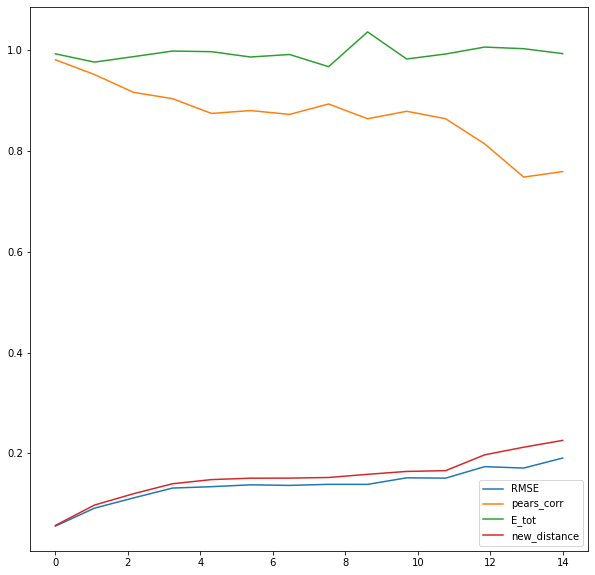

In [465]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

plot_data = lasso_fit[['RMSE', 'pears_corr', 'p_val', 'MSE', 'vector_fit','E_tot', 'best_fit', 'new_distance', 'img_wavelength', 'xrs_wavelength']].sort_values(by = 'new_distance')

metric_list = ['RMSE', 'pears_corr','E_tot', 'new_distance']

for this_metric in metric_list:
    linspace = np.linspace(0,len(plot_data), len(plot_data))
    ax.plot(linspace,plot_data[this_metric], label = this_metric)

ax.legend()

In [466]:
xray = all_fits.sort_values(by = 'E_tot').E_tot.to_list()
lin_co = all_fits.sort_values(by = 'E_tot').pears_corr

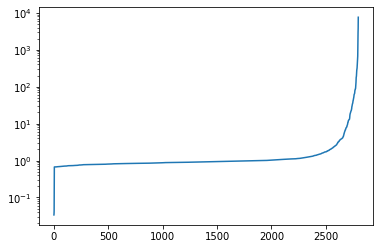

In [76]:
plt.plot(xray)
plt.yscale('log')
# plt.plot(lin_co)

In [73]:
xray

0       0.033641
0       0.035274
0       0.042974
0       0.669331
0       0.669350
        ...     
0    1223.265845
0    1675.482967
0    2957.244122
0    3759.658318
0    7596.696584
Name: E_tot, Length: 2800, dtype: float64